In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split, cross_val_score 

In [2]:
# Dane do obliczeń 
df = pd.read_csv("BankNote_Authentication.csv") 
df.head(20) 

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [6]:
# Sprawdzenie liczebności klas
df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [4]:
# Sprawdzenie wymiaru macierzy danych 
df.shape

(1372, 5)

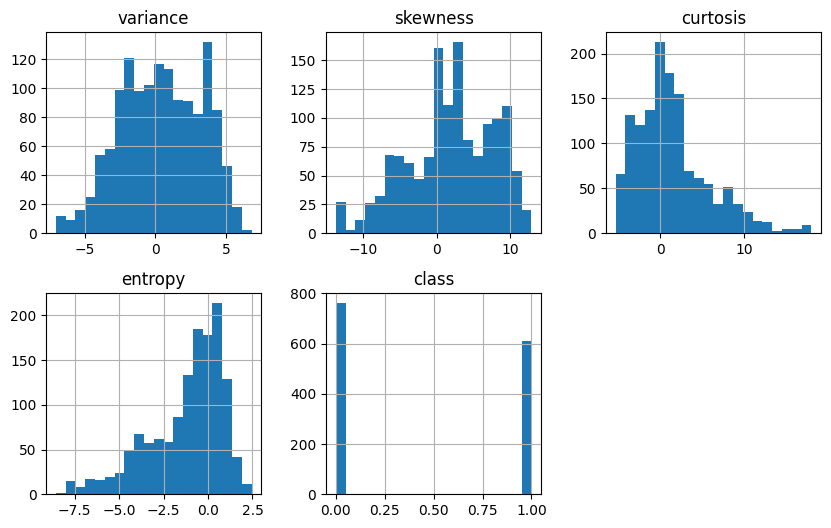

In [5]:
# Histogramy zmiennych 
df.hist(bins=20, figsize=(10,6), layout=(2,3)) 
plt.show() 

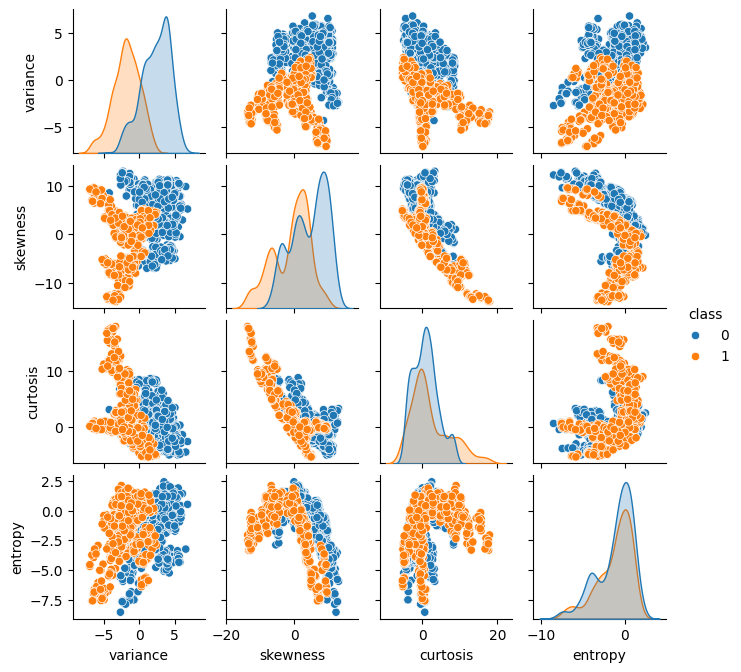

In [8]:
# Wykres macierzowy 
sns.pairplot(df, hue='class', height=1.7) 
plt.show()

In [11]:
# Podział na zbiór treningowy i testowy (dotyczy X i y) 
X = df.drop('class', axis=1) 
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097,), (275,))

In [13]:
# Klasyfikacja LDA 
da = LinearDiscriminantAnalysis()  # LDA 
da.fit(X_train, y_train)   # trenowanie klasyfikatora (dwie bo metoda z nadzorem)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [14]:
# Raport klasyfikacyjny dla zbioru testowego 
y_test_pred = da.predict(X_test)  # predykcja klas - zbiór testowy 
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       148
           1       0.95      1.00      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [15]:
y_train_pred = da.predict(X_train)  # predykcja klas - zbiór treningowy
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       614
           1       0.95      1.00      0.97       483

    accuracy                           0.98      1097
   macro avg       0.97      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



In [17]:
# Walidacja krzyżowa z podziałem zbioru na 4 części 
scores = cross_val_score(da, X, y, cv=5) 
# Dokładność dla każdego podzbioru, średnia dokładność i std 
print('Accuracy: ',scores) 
print('Accuracy (mean): ', scores.mean()) 
print('Accuracy (std): ', scores.std()) 

Accuracy:  [0.97818182 0.97454545 0.97445255 0.98540146 0.97080292]
Accuracy (mean):  0.9766768414067684
Accuracy (std):  0.0049472646861634575


In [18]:
scores = cross_val_score(da, X, y, cv=6, scoring='f1')
print('F1 score: ', scores)
print('F1 score (mean): ', scores.mean())
print('F1 score (std): ', scores.std())

F1 score:  [0.97607656 0.96682464 0.97142857 0.98076923 0.98536585 0.96650718]
F1 score (mean):  0.9744953387439197
F1 score (std):  0.006977169904732204
